# MIMIC-III EDA: Diagnoses and ICD Codes

This notebook explores the diagnoses and ICD code tables in the MIMIC-III dataset, and demonstrates how to join them with patient and ICU stay information.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')


## 1. Load Data

In [2]:
# File paths
DATA_DIR = './mimic-iii-clinical-database-1.4/'
patients = pd.read_csv(DATA_DIR + 'PATIENTS.csv')
admissions = pd.read_csv(DATA_DIR + 'ADMISSIONS.csv')
icustays = pd.read_csv(DATA_DIR + 'ICUSTAYS.csv')
diagnoses_icd = pd.read_csv(DATA_DIR + 'DIAGNOSES_ICD.csv')
d_icd_diagnoses = pd.read_csv(DATA_DIR + 'D_ICD_DIAGNOSES.csv')

print('Loaded tables:')
for name, df in [('patients', patients), ('admissions', admissions), ('icustays', icustays), ('diagnoses_icd', diagnoses_icd), ('d_icd_diagnoses', d_icd_diagnoses)]:
    print(f'{name}: {df.shape}')


Loaded tables:
patients: (46520, 8)
admissions: (58976, 19)
icustays: (61532, 12)
diagnoses_icd: (651047, 5)
d_icd_diagnoses: (14567, 4)


## 2. Preview Table Structures

In [3]:
from IPython.display import display

display(patients.head())
display(admissions.head())
display(icustays.head())
display(diagnoses_icd.head())
display(d_icd_diagnoses.head())


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


## 3. Join Tables: Link Patients, Admissions, ICU Stays, and Diagnoses

In [8]:
# Drop ROW_ID from all DataFrames to avoid merge conflicts
for df in [patients, admissions, icustays, diagnoses_icd, d_icd_diagnoses]:
    if 'ROW_ID' in df.columns:
        df.drop(columns=['ROW_ID'], inplace=True)

# Merge diagnoses with ICD descriptions
diagnoses_full = diagnoses_icd.merge(d_icd_diagnoses, how='left', left_on='ICD9_CODE', right_on='ICD9_CODE')
# Merge with admissions to get patient and admission info (brings in SUBJECT_ID)
diagnoses_full = diagnoses_full.merge(admissions, how='left', on='HADM_ID', suffixes=('', '_adm'))
# Now merge with patients using the SUBJECT_ID from admissions
diagnoses_full = diagnoses_full.merge(patients, how='left', left_on='SUBJECT_ID', right_on='SUBJECT_ID')
# Merge with icustays to get ICU stay info (optional, not all admissions have ICU stays)
diagnoses_full = diagnoses_full.merge(icustays, how='left', on=['SUBJECT_ID', 'HADM_ID'])

## 4. EDA: Diagnoses and ICD Codes

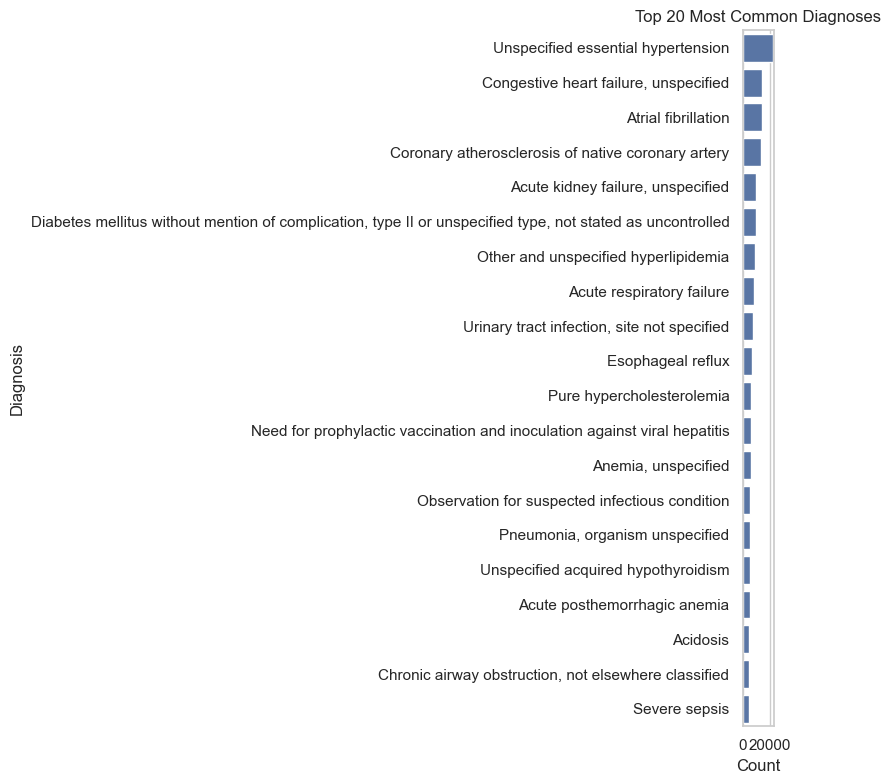

In [9]:
# Most common diagnoses
top_diagnoses = diagnoses_full['LONG_TITLE'].value_counts().head(20)
plt.figure(figsize=(8,8))
sns.barplot(y=top_diagnoses.index, x=top_diagnoses.values, orient='h')
plt.title('Top 20 Most Common Diagnoses')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.tight_layout()
plt.show()


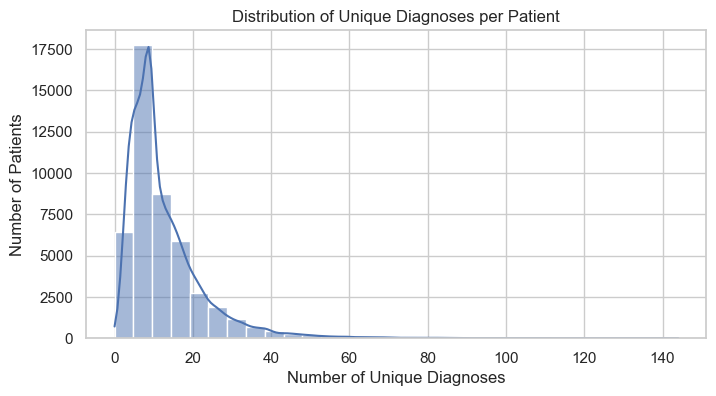

In [10]:
# Number of unique diagnoses per patient
diagnoses_per_patient = diagnoses_full.groupby('SUBJECT_ID')['ICD9_CODE'].nunique()
plt.figure(figsize=(8,4))
sns.histplot(diagnoses_per_patient, bins=30, kde=True)
plt.title('Distribution of Unique Diagnoses per Patient')
plt.xlabel('Number of Unique Diagnoses')
plt.ylabel('Number of Patients')
plt.show()


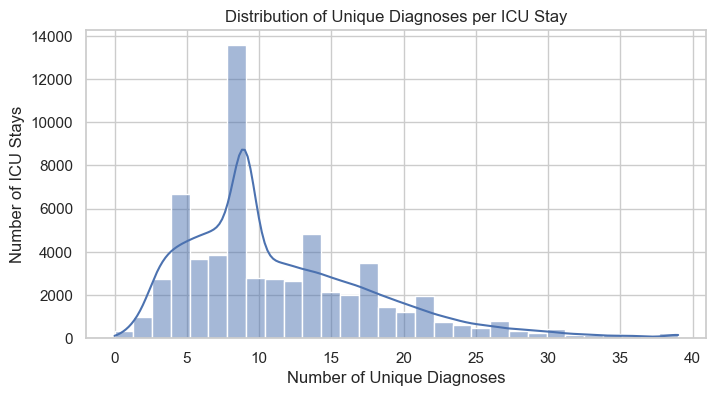

In [11]:
# Number of diagnoses per ICU stay
diagnoses_per_stay = diagnoses_full.groupby('ICUSTAY_ID')['ICD9_CODE'].nunique().dropna()
plt.figure(figsize=(8,4))
sns.histplot(diagnoses_per_stay, bins=30, kde=True)
plt.title('Distribution of Unique Diagnoses per ICU Stay')
plt.xlabel('Number of Unique Diagnoses')
plt.ylabel('Number of ICU Stays')
plt.show()


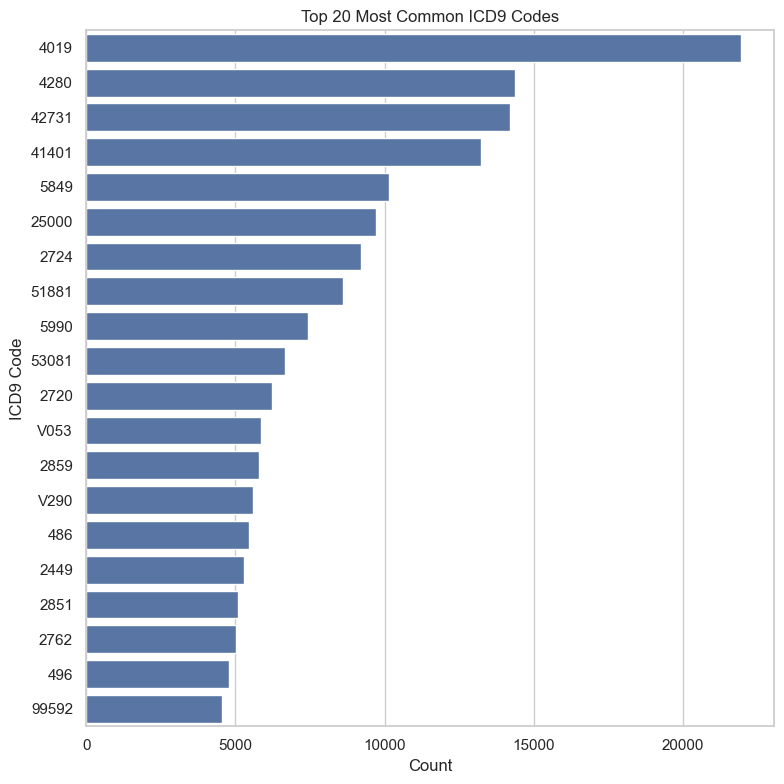

In [12]:
# Top ICD9 codes (not just descriptions)
top_icd9 = diagnoses_full['ICD9_CODE'].value_counts().head(20)
plt.figure(figsize=(8,8))
sns.barplot(y=top_icd9.index, x=top_icd9.values, orient='h')
plt.title('Top 20 Most Common ICD9 Codes')
plt.xlabel('Count')
plt.ylabel('ICD9 Code')
plt.tight_layout()
plt.show()


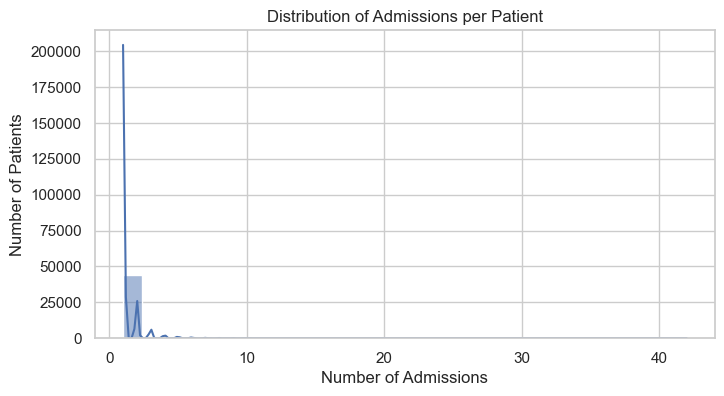

In [13]:
# Number of admissions per patient
admissions_per_patient = admissions.groupby('SUBJECT_ID')['HADM_ID'].nunique()
plt.figure(figsize=(8,4))
sns.histplot(admissions_per_patient, bins=30, kde=True)
plt.title('Distribution of Admissions per Patient')
plt.xlabel('Number of Admissions')
plt.ylabel('Number of Patients')
plt.show()


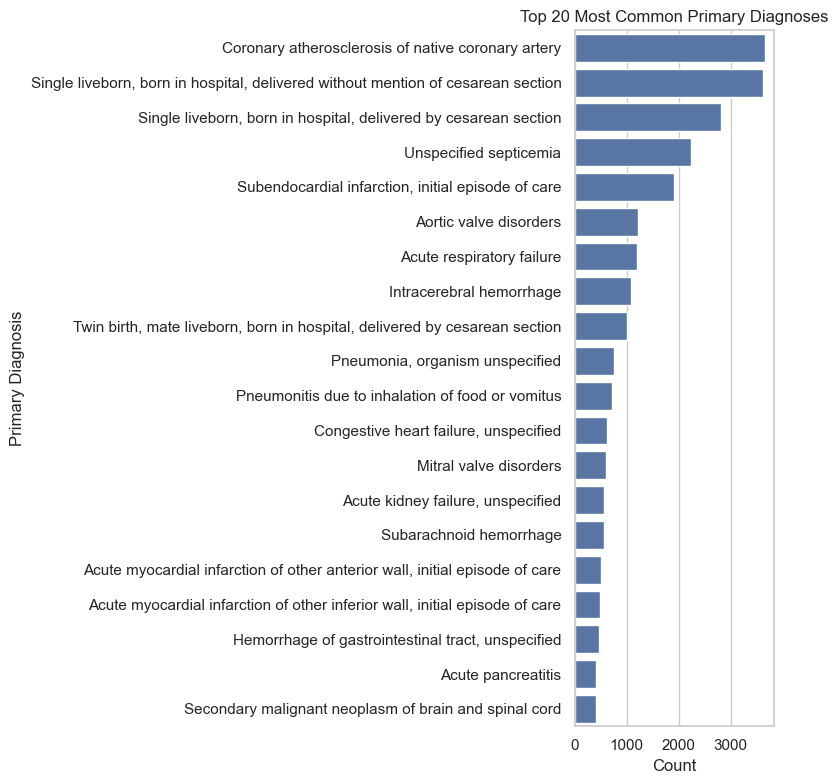

In [14]:
# Most common primary diagnoses (SEQ_NUM == 1)
primary_diag = diagnoses_full[diagnoses_full['SEQ_NUM'] == 1]
top_primary = primary_diag['LONG_TITLE'].value_counts().head(20)
plt.figure(figsize=(8,8))
sns.barplot(y=top_primary.index, x=top_primary.values, orient='h')
plt.title('Top 20 Most Common Primary Diagnoses')
plt.xlabel('Count')
plt.ylabel('Primary Diagnosis')
plt.tight_layout()
plt.show()


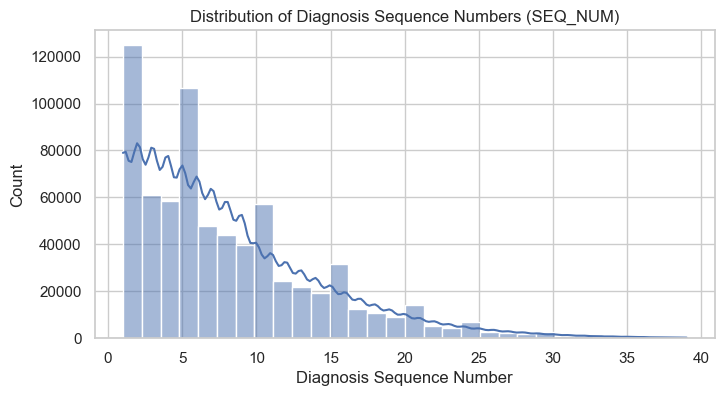

In [15]:
# Distribution of diagnosis sequence numbers
plt.figure(figsize=(8,4))
sns.histplot(diagnoses_full['SEQ_NUM'], bins=30, kde=True)
plt.title('Distribution of Diagnosis Sequence Numbers (SEQ_NUM)')
plt.xlabel('Diagnosis Sequence Number')
plt.ylabel('Count')
plt.show()


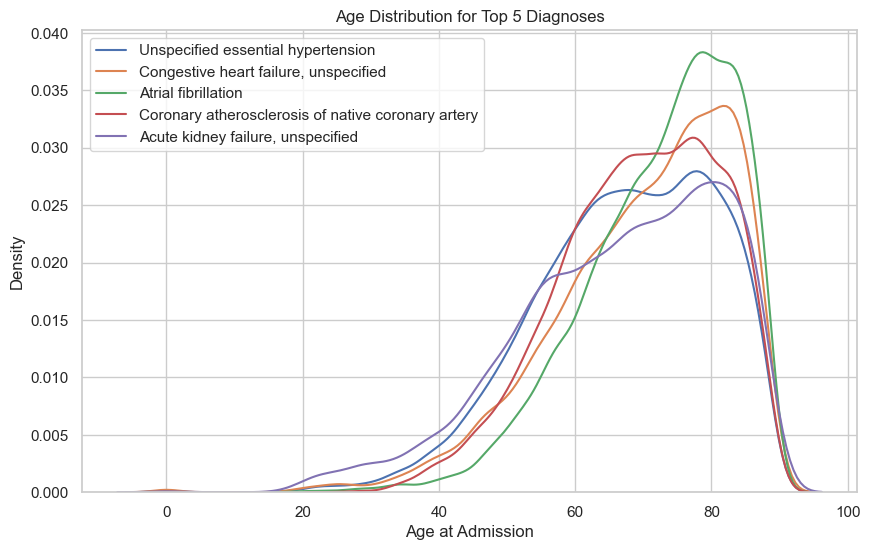

In [16]:
# Age distribution for top 5 diagnoses
from datetime import datetime

def calculate_age(row):
    try:
        dob = pd.to_datetime(row['DOB'])
        adm = pd.to_datetime(row['ADMITTIME'])
        age = (adm - dob).days / 365.25
        return age
    except:
        return None

diagnoses_full['AGE'] = diagnoses_full.apply(calculate_age, axis=1)
top5_diag = top_diagnoses.index[:5]
plt.figure(figsize=(10,6))
for diag in top5_diag:
    sns.kdeplot(diagnoses_full[diagnoses_full['LONG_TITLE'] == diag]['AGE'].dropna(), label=diag)
plt.title('Age Distribution for Top 5 Diagnoses')
plt.xlabel('Age at Admission')
plt.ylabel('Density')
plt.legend()
plt.show()


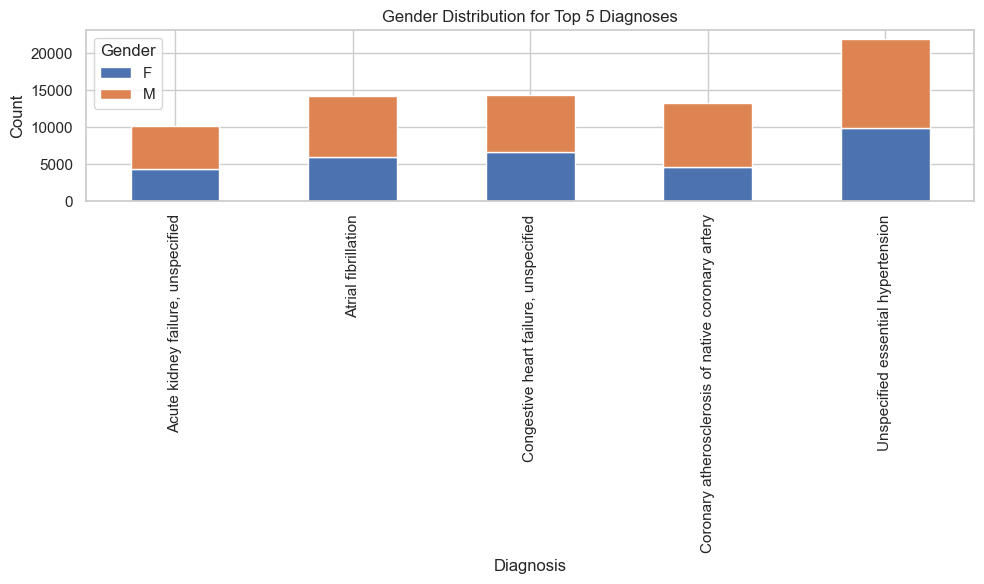

In [17]:
# Gender distribution for top 5 diagnoses
gender_counts = diagnoses_full[diagnoses_full['LONG_TITLE'].isin(top5_diag)].groupby(['LONG_TITLE', 'GENDER']).size().unstack().fillna(0)
gender_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Gender Distribution for Top 5 Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


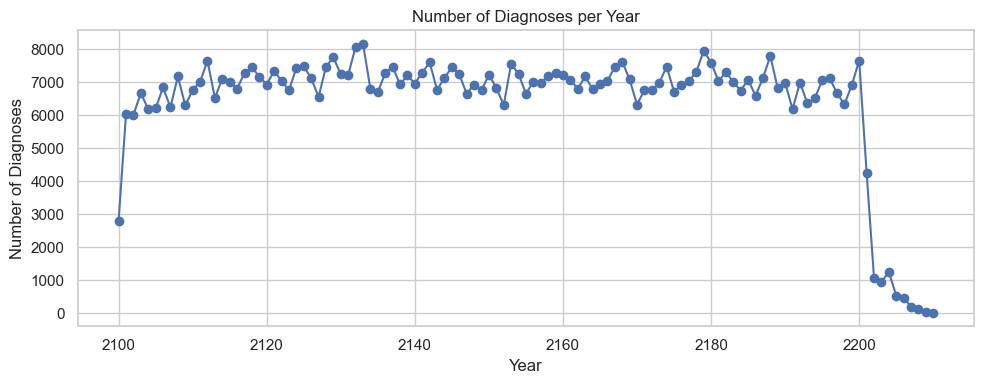

In [18]:
# Diagnoses per year
diagnoses_full['ADMIT_YEAR'] = pd.to_datetime(diagnoses_full['ADMITTIME']).dt.year
trend = diagnoses_full.groupby('ADMIT_YEAR')['ICD9_CODE'].count()
plt.figure(figsize=(10,4))
trend.plot(marker='o')
plt.title('Number of Diagnoses per Year')
plt.xlabel('Year')
plt.ylabel('Number of Diagnoses')
plt.tight_layout()
plt.show()


In [19]:
# Most common pairs of diagnoses (comorbidities)
from itertools import combinations
from collections import Counter

# For speed, use a sample if the dataset is very large
sample = diagnoses_full[['HADM_ID', 'ICD9_CODE']].drop_duplicates()
grouped = sample.groupby('HADM_ID')['ICD9_CODE'].apply(list)
pairs = Counter()
for codes in grouped:
    for pair in combinations(sorted(set(codes)), 2):
        pairs[pair] += 1
common_pairs = pairs.most_common(10)
print('Top 10 most common comorbidity pairs (ICD9 codes):')
for (code1, code2), count in common_pairs:
    print(f'{code1} & {code2}: {count}')


Top 10 most common comorbidity pairs (ICD9 codes):
4019 & 41401: 6840
4019 & 42731: 5784
42731 & 4280: 5743
2724 & 4019: 5226
25000 & 4019: 5050
4019 & 4280: 4756
41401 & 4280: 4609
41401 & 42731: 4311
V053 & V290: 4154
2720 & 4019: 3858


## 5. Further Exploration
You can extend this notebook to explore comorbidities, trends over time, or link to other tables (e.g., procedures, outcomes).